---
# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset : Life_expectancy_dataset

## Objective : 

Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mendeteksi kelompok negara dan jawab pertanyaan dibawah ini sebagai acuan analisa/cerita :

-   Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?
-   Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.
-   Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?
-   Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?
-   Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu

---
# 2. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [94]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import chardet

---
# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, 

In [2]:
#Data Loading from credit-card-information
P1LC3 = 'Life_expectancy_dataset.csv'
with open(P1LC3, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

df = pd.read_csv(P1LC3, encoding="ISO-8859-1")
df.head(10)

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
5,6,Iceland,83.0,80.9,85.3,Europe
6,7,"Hong Kong, China",82.9,80.3,85.8,Asia
7,8,Andorra,82.8,80.6,85.1,Europe
8,9,Switzerland,82.6,80.3,85.0,Europe
9,10,Guernsey,82.5,79.9,85.4,Europe


In [3]:
#show tail data
df.tail(10)

,Rank,Country,Overall Life,Male Life,Female Life,Continent
213,214,Mozambique,53.3,52.6,54.1,Africa
214,215,Lesotho,53.0,52.9,53.1,Africa
215,216,Zambia,52.5,50.8,54.1,Africa
216,217,Somalia,52.4,50.3,54.5,Africa
217,218,Central African Republic,52.3,51.0,53.7,Africa
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa
222,223,Chad,50.2,49.0,51.3,Africa


In [5]:
# copy df untuk menjaga data asli
df_copy = df.copy()

In [6]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


In [7]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


Tidak ada null data. Lanjutkan ke EDA untuk melihat isi data.

---
# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

In [8]:
df_copy.head(15)

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
5,6,Iceland,83.0,80.9,85.3,Europe
6,7,"Hong Kong, China",82.9,80.3,85.8,Asia
7,8,Andorra,82.8,80.6,85.1,Europe
8,9,Switzerland,82.6,80.3,85.0,Europe
9,10,Guernsey,82.5,79.9,85.4,Europe


In [9]:
df_EDA = df.copy()

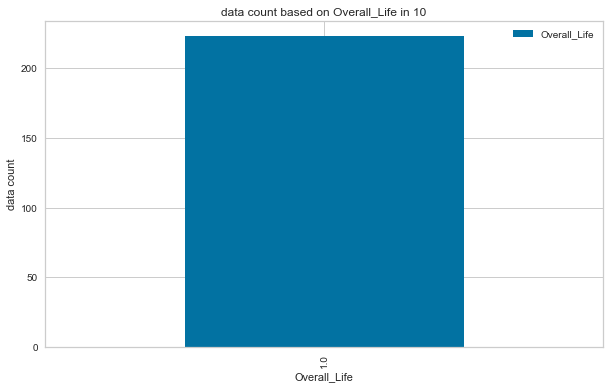

In [45]:
#tampilkan data berdasarkan Overall_Life
df_EDA['Overall_Life'] = np.ceil(df_EDA['Overall_Life']/10)
gruopeddf = df_EDA.groupby(['Overall_Life'])[['Overall_Life']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Overall_Life') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on Overall_Life in 10') # add title to the plot

plt.show()

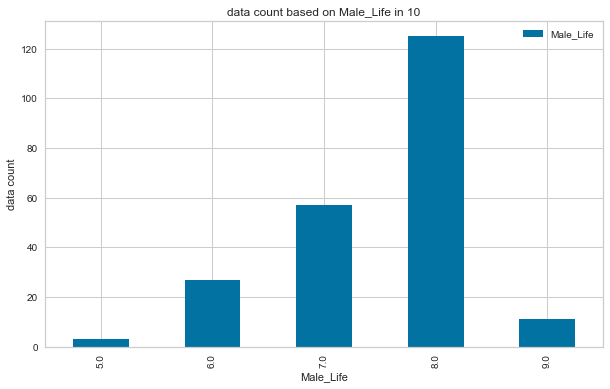

In [29]:
#tampilkan data Male_Life
df_EDA['Male_Life'] = np.ceil(df_EDA['Male Life']/10)
gruopeddf = df_EDA.groupby(['Male_Life'])[['Male_Life']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Male_Life') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on Male_Life in 10') # add title to the plot

plt.show()

Kebanyakan negara memiliki ekspetasi umur Male_life pada 70 - 80 tahun, sedikit pada umur 80-90

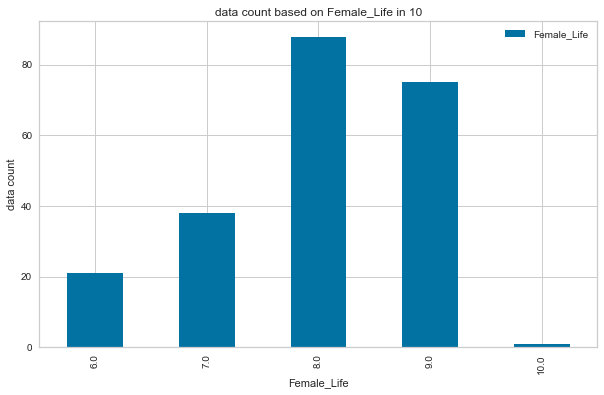

In [36]:
#tampilkan data berdasarkan one off purchase
df_EDA['Female_Life'] = np.ceil(df_EDA['Female Life']/10)
gruopeddf = df_EDA.groupby(['Female_Life'])[['Female_Life']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Female_Life') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on Female_Life in 10') # add title to the plot

plt.show()

Kebanyakan negara memiliki ekspetasi umur Female_life pada 70 - 80 tahun, tidak sedikit yang berada pada umur 80-90, sedikit 90 - 100

In [41]:
df_EDA.groupby(['Continent'])[['Overall Life']].mean()

,Overall Life
Continent,
Africa,1.0
Asia,1.0
Europe,1.0
North America,1.0
Oceania,1.0
South America,1.0


In [43]:
df_EDA.groupby(['Continent'])[['Male Life']].mean()

,Male Life
Continent,
Africa,60.109091
Asia,71.046939
Europe,76.003922
North America,73.914706
Oceania,71.625000
South America,72.157143


In [40]:
df_EDA.groupby(['Continent'])[['Female Life']].mean()

,Female Life
Continent,
Africa,63.583636
Asia,76.138776
Europe,82.237255
North America,78.738235
Oceania,76.915000
South America,77.992857


Dari Overall Life Expectancy, Female Life dan Male Life, Continent Afrika jauh di bawah dibandingkan negara lain, diasumsikan mayoritas negara di africa cluster dengan ekspetasi terendah, sedangkan Europe akan dominasi pada cluster dengan life expectancy tinggi

---
# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [12]:
df_copy.shape

(223, 6)

Data yang di ambil hanya 20 data dari 233

In [15]:
#Get data inference sebanyak 20 row sample dan lock randomize.
df_inf = df_copy.sample(20, random_state = 15)
df_inf.shape

(20, 6)

In [16]:
# Hapus data yang dipakai oleh data inference dari df
X_train = df_copy.drop(df_inf.index)
# Cek ukuran dataset untuk train dan test, telah berkurang 30 row dari 4475:
X_train.shape

(203, 6)

In [17]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

In [18]:
X_train

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

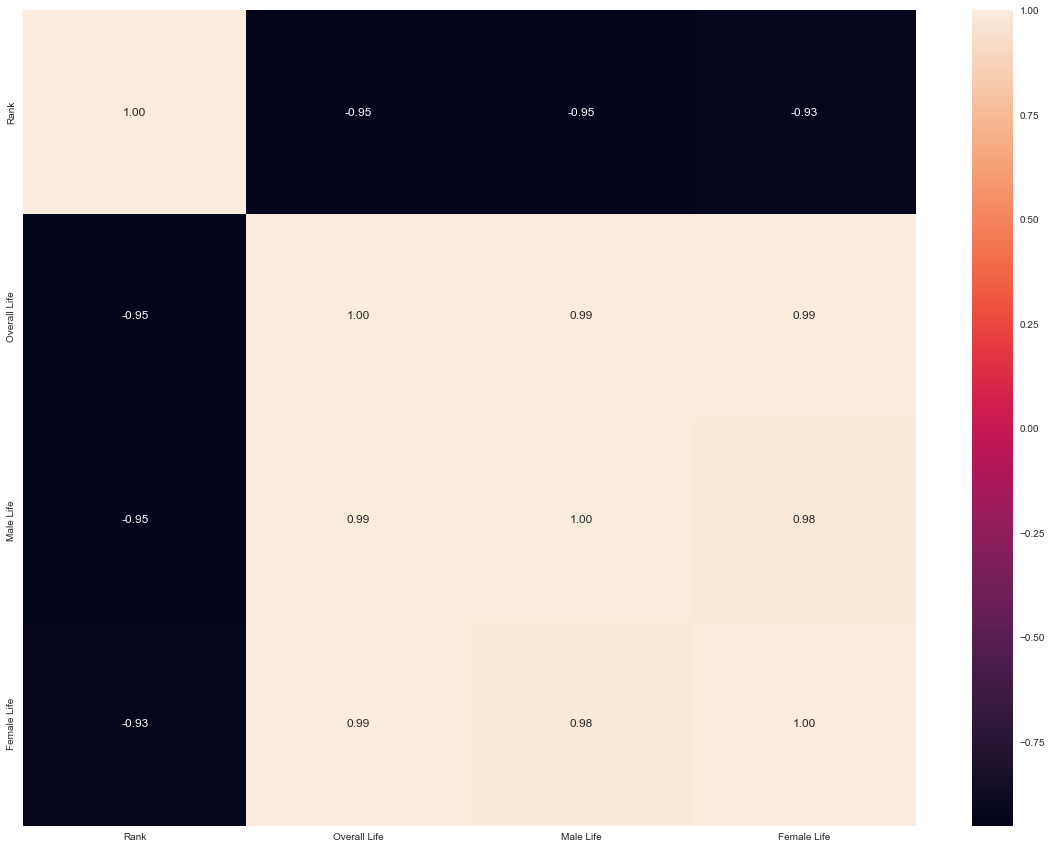

In [19]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f')
plt.show()

dari heatmap dapat diketahui bahwa feature memiliki korelasi satu dengan lainnya. Lanjut dengan memilih kolom numeric k dikarenakan PCA hanya mengolah fitur-fitur numeric. Semua kolom numerik akan dipilih, dikarenakan tidak adanya target.

In [20]:
#Display X_train to see the features
X_train.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [21]:
#Memilih feature numerical dan categorical
num_col =['Overall Life', 'Male Life','Female Life']
cat_col = ['Rank','Country','Continent']

In [22]:
# Split data set sesuai dengan categorical dan numerical
X_num = X_train[num_col]
X_cat = X_train[cat_col]

In [23]:
#show Xtrain num
X_num.head(5)

,Overall Life,Male Life,Female Life
0,89.5,85.6,93.5
1,85.0,81.7,88.5
2,85.0,82.3,87.8
3,84.5,81.6,87.6
4,83.3,80.7,86.1


## Missing value handling

In [24]:
# Looking missing value in X_train
X_num.isnull().sum()

Overall Life    0
Male Life       0
Female Life     0
dtype: int64

Tidak terdapat missing value, lanjutkan outliers handling

## Outliers handling

Plot setiap data numerik untuk melihat adanya outliers serta melihat distribusinya.

In [25]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable)
    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

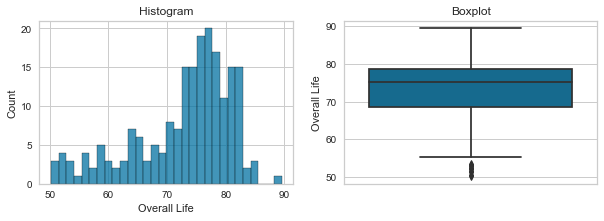

Overall Life
skewness: -0.9715137613621124
the distribution is skewed


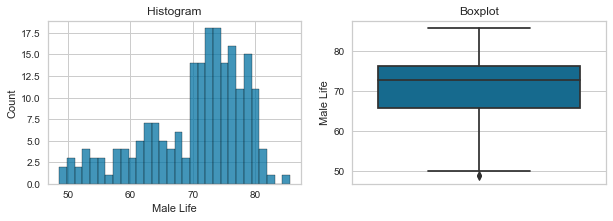

Male Life
skewness: -0.8713421056205187
the distribution is skewed


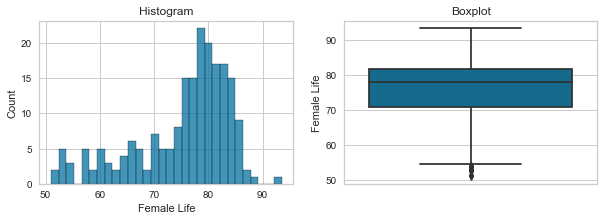

Female Life
skewness: -1.025602040169456
the distribution is skewed


In [27]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
for i in X_num.columns:
    hist_boxplot(X_num, i)

dikarenakan kebanyakan outlier mencapai 10% dari keseluruhan data maka, data harus di handle dengan capping karena jika di trimming data akan berkurang banyak dan mengakibatkan kehilangan data yang penting.

## Feature Scaling

Selanjutnya lakukan scaling dengan menggunakan minmaxscaller dikarenakan seluruh data memiliki distribusi skew.

In [ ]:
#Feature scaling dengan menggunakan minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_num)

X_num_sc = scaler.transform(X_num) #scaling train
X_num_sc

## Dimension Reduction

Lakukan dimension reduction untuk meringankan process clustering serta meningkatkan ketepatan hasil clustering.

In [29]:
# Create DataFrame of `X_train_final`

X_num_fin = pd.DataFrame(X_num_sc, columns=num_col)
X_num_fin

,Overall Life,Male Life,Female Life
0,1.000000,1.000000,1.000000
1,0.885496,0.894595,0.882353
2,0.885496,0.910811,0.865882
3,0.872774,0.891892,0.861176
4,0.842239,0.867568,0.825882
...,...,...,...
198,0.048346,0.081081,0.035294
199,0.035623,0.097297,0.000000
200,0.027990,0.035135,0.040000
201,0.010178,0.000000,0.040000


### VIF

Lakukan VIF untuk melihat banyaknya dimensi yang di rekomendasikan.

In [30]:
vif_data = pd.DataFrame()
vif_data["features"] = X_num_fin.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_num_fin.values, i)
                        for i in range(len(X_num_fin.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,features,VIF
0,Overall Life,5402.083664
1,Male Life,1548.296546
2,Female Life,1537.416265


Jumlah dimensi yang direkomendasikan ditunjukkan dari banyaknya kolom dengan nilai VIF diatas 5 yang dimana adalah 3 dimensi

### EVR

In [32]:
pca = PCA()
pca.fit(X_num_fin)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.999) + 1
d

2

PCA sebenernya tidak diperlukan karena sedikitnya kolom yang tersedia maka persentasi dimensional reduction sudah tinggi mulai dari dimensi pertama. Karena PCA harus dilakukan diambil reduksi hanya 2 dimensi

In [33]:
print(cumsum)

[0.99240652 0.99971045 1.        ]


dengan 2 dimensi telah mewakili 99 % data

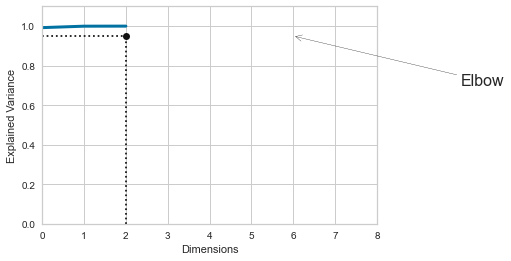

In [34]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(6, 0.95), xytext=(10, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

Hasil EVR menunjukkan bahwa dengan menggunakan 2 dimensi telah mencakup 99,2% dari data. Maka 2 dimensi diambil sebagai jumlah dimensi PCA.

### PCA

In [35]:
pca = PCA(n_components=2)
pca.fit(X_num_fin)
X_reduced = pca.transform(X_num_fin)

PCA telah dilakukan

### Defining n cluster

In [36]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(X_reduced)
                for k in range(1, 9)]

c:\Users\SBD-HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Elbow Method


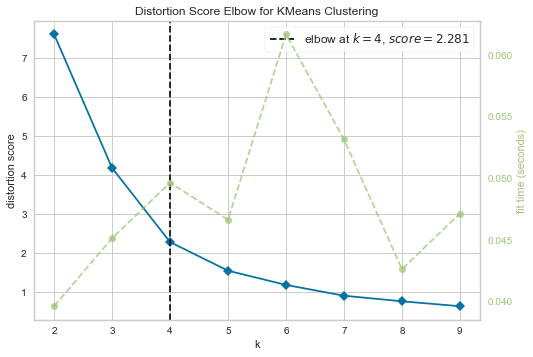

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(X_reduced)
Elbow_M.show()

In [38]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in range(1, 7)]

silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

c:\Users\SBD-HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


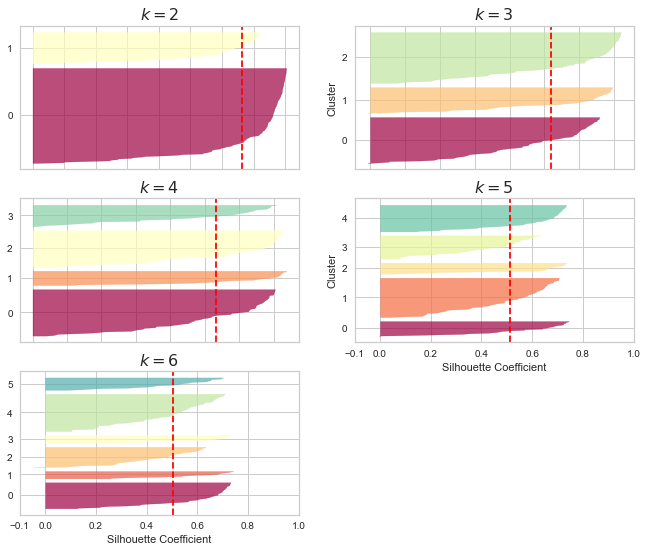

In [39]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_reduced, y_pred)

    padding = len(X_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


Melihat dari hasil ELbow dan silhouette, jumlah clsuter yang direkomendasikan adalah 4. Dilihat dari semua pisau (grafik) melewati garis merah dan bentuk masing-masing pisau tidak terlalu kontras.

---
# 6. Model definition

Notes :
Algorithm which will be used are KMeans,Spectral,Agglomerative.

Dengan metrics yang akan dipakai untuk mengevaluasi adalah pca 2d dan sihouette score

---
# 7. Model Training

Semua model menggunakan hasil elbow dan silhouette visualization, maka n_clusters = 4 bagi semua model

## KMeans

In [40]:
#fit K Means
kmeans = KMeans(n_clusters=4, random_state=15)
kmeans.fit(X_reduced)

KMeans(n_clusters=4, random_state=15)

---
# 8. Model Evaluation

### Input clustering results

In [52]:
Cluster = X_train.copy()
Cluster['cluster_kmeans'] = kmeans.labels_

In [53]:
Cluster

,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster_kmeans
0,1,Monaco,89.5,85.6,93.5,Europe,3
1,2,Japan,85.0,81.7,88.5,Asia,3
2,3,Singapore,85.0,82.3,87.8,Asia,3
3,4,Macau; China,84.5,81.6,87.6,Asia,3
4,5,San Marino,83.3,80.7,86.1,Europe,3
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,2
219,220,Swaziland,51.6,52.2,51.0,Africa,2
220,221,Afghanistan,51.3,49.9,52.7,Asia,2
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,2


### 2D mapping

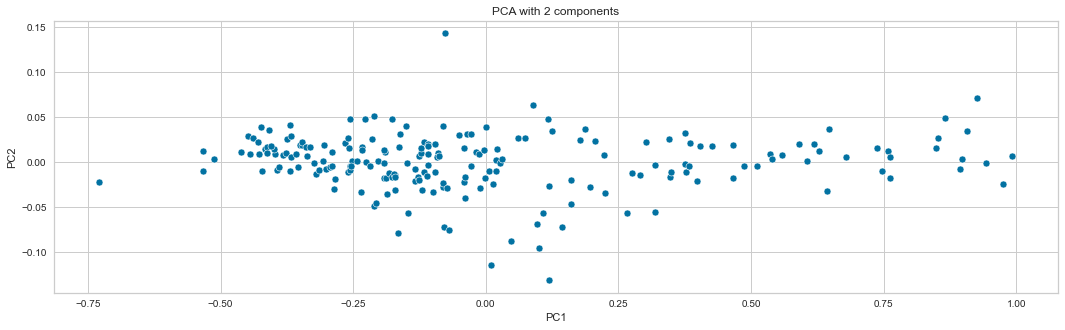

In [54]:
pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(X_reduced)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

Text(0.5, 1.0, 'KMeans Clusters')

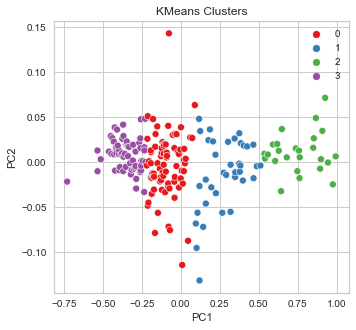

In [56]:
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')

dilihat dari 2D mapping, K means menunjukkan hasil clustering dengan garis yang lebih tegas (sedikit terdapat data yang menumpuk ke cluster lainnya).

### Silhouette Score

In [57]:
print("silhouette score KMeans : ",silhouette_score(X_reduced,kmeans.labels_))

silhouette score KMeans :  0.5326596599987266


Seperti hasil analisis pada 2D, hasil silhouette score juga menunjukkan bahwa K means menunjukkan performa yang bagus. Semakin mendekati 1 maka clustering semakin baik tidak adanya data yang mengalami kesalahan berada pada cluster yang salah.

# EDA after clustering

Setelah clustering dilakukan, maka EDA perlu di lakukan sekali lagi untuk melihat dan menganalisa hasil clustering.

In [58]:
Cluster

,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster_kmeans
0,1,Monaco,89.5,85.6,93.5,Europe,3
1,2,Japan,85.0,81.7,88.5,Asia,3
2,3,Singapore,85.0,82.3,87.8,Asia,3
3,4,Macau; China,84.5,81.6,87.6,Asia,3
4,5,San Marino,83.3,80.7,86.1,Europe,3
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,2
219,220,Swaziland,51.6,52.2,51.0,Africa,2
220,221,Afghanistan,51.3,49.9,52.7,Asia,2
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,2


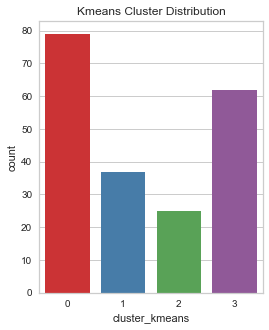

In [60]:
plt.figure(figsize=(4, 5))
sns.countplot(data=Cluster, x='cluster_kmeans', palette='Set1')
plt.title('Kmeans Cluster Distribution')
plt.show()

Clustering terdapat 2 cluster yang dominan dibanding cluster lain. Cluster ini dapat dilihat lebih lanjut pada proses EDA

### EDA KMeans result

In [73]:
#Pemisahan cluster
cluster0 = Cluster[(Cluster['cluster_kmeans'] == 0)]
cluster1 = Cluster[(Cluster['cluster_kmeans'] == 1)]
cluster2 = Cluster[(Cluster['cluster_kmeans'] == 2)]
cluster3 = Cluster[(Cluster['cluster_kmeans'] == 3)]

In [74]:
#membuat data summary
summary = pd.DataFrame()
summary['cluster'] = [0,1,2,3]

for i in num_col:
    data = []
    data.append(cluster0[i].mean())
    data.append(cluster1[i].mean())
    data.append(cluster2[i].mean())
    data.append(cluster3[i].mean())

    summary[i] = data
    


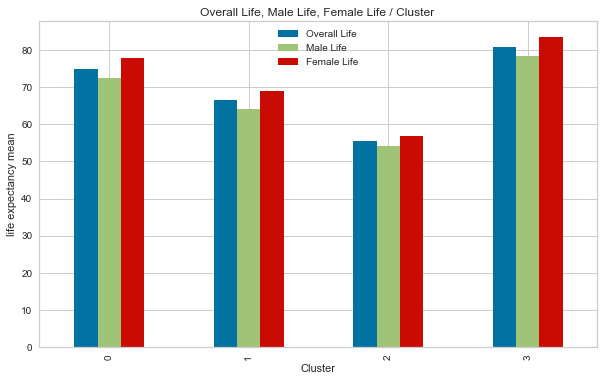

In [75]:
#lakukan plotting terhadap semua feature yang digunakan dalam clustering
summary_plot = summary.set_index('cluster')
summary_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster') # add to x-label to the plot
plt.ylabel('life expectancy mean') # add y-label to the plot
plt.title( 'Overall Life, Male Life, Female Life / Cluster ') # add title to the plot

plt.show()

In [89]:
summary

,cluster,Overall Life,Male Life,Female Life
0,0,74.959494,72.317722,77.726582
1,1,66.535135,63.956757,69.005405
2,2,55.548000,54.256000,56.872000
3,3,80.838710,78.248387,83.582258


Dari grafik plot bar 

Cluster 0 merupakan cluster life dengan life expectancy tertinggi ke 2 dengan kisaran 72-77 tahun

Cluster 1 merupakan cluster life dengan life expectancy terendah ke 2 dengan kisaran 63-69 tahun

Cluster 2 merupakan cluster life dengan life expectancy paling rendah dengan kisaran 54-57 tahun

Cluster 3 merupakan cluster life dengan life expectancy tertinggi dengan kisaran 78-83 tahun

In [88]:
cluster_0 = cluster0.groupby(["Continent"])[["Continent"]].count()
cluster_1 = cluster1.groupby(["Continent"])[["Continent"]].count()
cluster_2 = cluster2.groupby(["Continent"])[["Continent"]].count()
cluster_3 = cluster3.groupby(["Continent"])[["Continent"]].count()

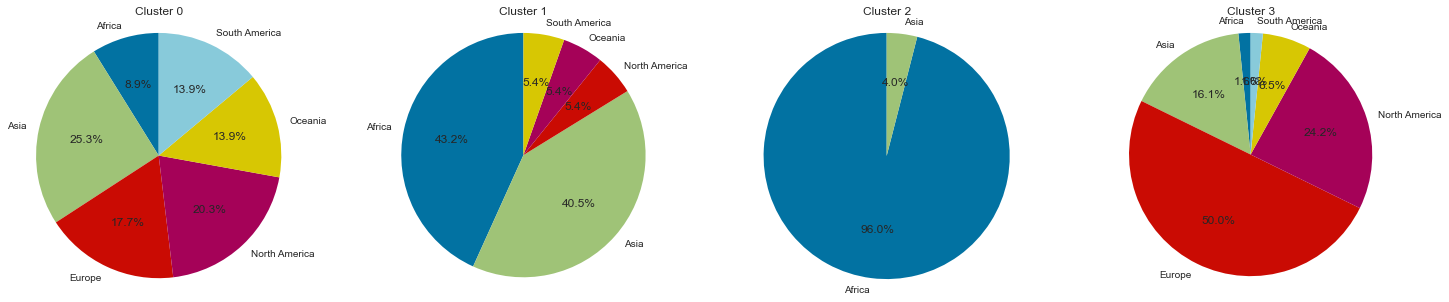

In [102]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
cluster_0.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Cluster 0')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplot(1,4,2)
cluster_1.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Cluster 1')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplot(1,4,3)
cluster_2.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Cluster 2')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplot(1,4,4)
cluster_3.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Cluster 3')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

Sesuai dengan EDA di awal mayoritas afrika akan berada pada cluster life expectancy rendah cluster 1 dan 2

Eropa denfan cluster life expectancy tertinggi yakni cluster 0 dan 3

Continent yang tersisa akan menyebar di berbagai cluster karena bukan dengan life expectancy yang mencolok atau ekstreme (rendah sekali atau tingggi sekali)

In [111]:
print('List Negara sesuai life expectancty:')
print('Negara life expectancy tertinggi (78-83 tahun):', cluster3.Country.unique())
print('')
print('Negara life expectancy tertinggi kedua (72-77 tahun):', cluster0.Country.unique())
print('')
print('Negara life expectancy terendah (54-57 tahun):', cluster2.Country.unique())
print('')
print('Negara life expectancy terendah kedua (63-69 tahun:', cluster1.Country.unique())

List Negara sesuai life expectancty:
Negara life expectancy tertinggi (78-83 tahun): ['Monaco' 'Japan' 'Singapore' 'Macau; China' 'San Marino' 'Iceland'
 'Hong Kong, China' 'Andorra' 'Switzerland' 'Guernsey' 'Israel'
 'South Korea' 'Luxembourg' 'Australia' 'Italy' 'Sweden' 'Canada' 'Jersey'
 'Liechtenstein' 'France, metropolitan' 'Spain' 'Austria' 'Anguilla'
 'Bermuda' 'Netherlands' 'Cayman Islands' 'Isle of Man' 'New Zealand'
 'Belgium' 'Finland' 'Ireland' 'Germany' 'United Kingdom' 'Greece'
 'Saint Pierre and Miquelon' 'Malta' 'European Union' 'Taiwan'
 'U.S. Virgin Islands' 'Turks and Caicos Islands' 'United States'
 'Wallis and Futuna' 'Saint Helena, Ascension and Tristan da Cunha'
 'Denmark' 'Gibraltar' 'Puerto Rico' 'Portugal' 'Bahrain' 'Chile' 'Cuba'
 'Cyprus' 'Qatar' 'British Virgin Islands' 'Costa Rica' 'Czech Republic'
 'Panama' 'Albania' 'Slovenia' 'Dominican Republic' 'Sint Maarten'
 'Kuwait' 'Northern Mariana Islands; US']

Negara life expectancy tertinggi kedua (72-77 tah

- Negara life expectancy tertinggi (78-83 tahun): ['Monaco' 'Japan' 'Singapore' 'Macau; China' 'San Marino' 'Iceland'
 'Hong Kong, China' 'Andorra' 'Switzerland' 'Guernsey' 'Israel'
 'South Korea' 'Luxembourg' 'Australia' 'Italy' 'Sweden' 'Canada' 'Jersey'
 'Liechtenstein' 'France, metropolitan' 'Spain' 'Austria' 'Anguilla'
 'Bermuda' 'Netherlands' 'Cayman Islands' 'Isle of Man' 'New Zealand'
 'Belgium' 'Finland' 'Ireland' 'Germany' 'United Kingdom' 'Greece'
 'Saint Pierre and Miquelon' 'Malta' 'European Union' 'Taiwan'
 'U.S. Virgin Islands' 'Turks and Caicos Islands' 'United States'
 'Wallis and Futuna' 'Saint Helena, Ascension and Tristan da Cunha'
 'Denmark' 'Gibraltar' 'Puerto Rico' 'Portugal' 'Bahrain' 'Chile' 'Cuba'
 'Cyprus' 'Qatar' 'British Virgin Islands' 'Costa Rica' 'Czech Republic'
 'Panama' 'Albania' 'Slovenia' 'Dominican Republic' 'Sint Maarten'
 'Kuwait' 'Northern Mariana Islands; US']


- Negara life expectancy tertinggi kedua (72-77 tahun): ['Falkland Islands' 'Saint Lucia' 'New Caledonia' 'Lebanon' 'Poland'
 'United Arab Emirates' 'Brunei' 'French Polynesia' 'Paraguay' 'Uruguay'
 'Argentina' 'Slovakia' 'Dominica' 'Morocco' 'Algeria' 'Aruba' 'Ecuador'
 'Sri Lanka' 'Bosnia and Herzegovina' 'Estonia' 'Antigua and Barbuda'
 'Libya' 'Georgia' 'Republic of Macedonia' 'Tonga' 'Croatia' 'Mexico'
 'Venezuela' 'Colombia' 'Saint Kitts and Nevis' 'Maldives' 'Mauritius'
 'Oman' "People's Republic of China" 'Serbia' 'American Samoa' 'Barbados'
 'Saint Vincent and the Grenadines' 'Saudi Arabia' 'Solomon Islands'
 'Romania' 'Malaysia' 'West Bank' 'Iraq' 'Syria' 'Turkey' 'El Salvador'
 'Seychelles' 'Thailand' 'Jordan' 'Bulgaria' 'Latvia' 'Montserrat'
 'Gaza Strip' 'Brazil' 'Uzbekistan' 'Peru' 'Samoa' 'Jamaica' 'Vanuatu'
 'Vietnam' 'Nicaragua' 'Marshall Islands' 'Palau'
 'Federated States of Micronesia' 'Trinidad and Tobago' 'Belarus' 'Egypt'
 'Fiji' 'Azerbaijan' 'Greenland; Denmark' 'The Bahamas' 'Guatemala'
 'Suriname' 'Cabo Verde' 'Ukraine' 'Iran' 'Honduras' 'Nepal']

 - Negara life expectancy terendah (54-57 tahun): ['Guinea' 'Burundi' 'Rwanda' 'Republic of the Congo' 'Liberia'
 "Côte d'Ivoire" 'Cameroon' 'Sierra Leone' 'Zimbabwe'
 'Democratic Republic of the Congo' 'Angola' 'Mali' 'Burkina Faso' 'Niger'
 'Uganda' 'Nigeria' 'Mozambique' 'Lesotho' 'Zambia'
 'Central African Republic' 'Gabon' 'Swaziland' 'Afghanistan'
 'Guinea-Bissau' 'Chad']

 -  Negara life expectancy terendah kedua (63-69 tahun: ['Indonesia' 'Kazakhstan' 'Kyrgyzstan' 'North Korea' 'Russia' 'Bhutan'
 'Turkmenistan' 'Mongolia' 'Bolivia' 'Philippines' 'Belize' 'India'
 'Guyana' 'Timor-Leste' 'Pakistan' 'Tajikistan' 'Nauru' 'Ghana' 'Kiribati'
 'Madagascar' 'Yemen' 'Togo' 'Eritrea' 'São Tomé and Príncipe'
 'The Gambia' 'Laos' 'Comoros' 'Equatorial Guinea' 'Sudan' 'Kenya' 'Haiti'
 'Namibia' 'South Africa' 'Ethiopia' 'Tanzania' 'Senegal' 'Malawi']



---
# 9. Model Inference

Lakukan model inference dengan data baru

In [112]:
df_inf.head(3)

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,172,Tuvalu,66.5,64.3,68.8,Oceania
1,123,Grenada,74.3,71.7,77.1,North America
2,217,Somalia,52.4,50.3,54.5,Africa


In [113]:
X_inf = df_inf[num_col]

In [114]:
# Looking missing value in X_train
X_inf.isnull().sum()


Overall Life    0
Male Life       0
Female Life     0
dtype: int64

In [115]:
# Looking missing value in X_train
X_inf.isnull().sum()


Overall Life    0
Male Life       0
Female Life     0
dtype: int64

In [118]:
#lakukan scaling
X_inf_scaled = scaler.transform(X_inf) 
X_inf_fin = pd.DataFrame( X_inf_scaled , columns=num_col)

In [119]:
#lakukan pca
X_inf_reduced = pca.transform(X_inf_fin)

In [120]:
#apply model
inf_cluster = df_inf.copy()

inf_cluster['kmeans_cluster'] = kmeans.predict(X_inf_reduced)

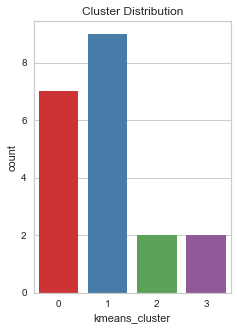

In [121]:
#show clustering result
plt.figure(figsize=(12, 5))

plt.subplot(1,3,1)
sns.countplot(data=inf_cluster, x='kmeans_cluster', palette='Set1')
plt.title('Cluster Distribution')

plt.show()

In [122]:
inf_cluster

,Rank,Country,Overall Life,Male Life,Female Life,Continent,kmeans_cluster
0,172,Tuvalu,66.5,64.3,68.8,Oceania,1
1,123,Grenada,74.3,71.7,77.1,North America,0
2,217,Somalia,52.4,50.3,54.5,Africa,2
3,21,Norway,81.8,79.8,83.9,Europe,3
4,37,Faroe Islands,80.4,77.8,83.1,Europe,3
5,180,Cambodia,64.5,62.0,67.1,Asia,1
6,188,Djibouti,63.2,60.7,65.8,Africa,1
7,168,Papua New Guinea,67.2,65.0,69.5,Oceania,1
8,132,Bangladesh,73.2,71.0,75.4,Asia,0
9,194,Benin,61.9,60.5,63.3,Africa,1


In [124]:
inf_cluster.groupby(['kmeans_cluster','Continent', 'Country'])[["Overall Life"]].mean()

Overall Life
kmeans_cluster Continent     Country                       
0              Africa        Tunisia                   76.1
               Asia          Bangladesh                73.2
               Europe        Armenia                   74.6
                             Hungary                   75.9
                             Lithuania                 74.9
               North America Grenada                   74.3
               Oceania       Cook Islands              75.8
1              Africa        Benin                     61.9
                             Djibouti                  63.2
                             Mauritania                63.0
                             Western Sahara            63.0
               Asia          Burma                     66.6
                             Cambodia                  64.5
               Europe        Moldova                   70.7
               Oceania       Papua New Guinea          67.2
                             Tuvalu                    66.5
2              Africa        Botswana                  54.5
                             Somalia                   52.4
3              Europe        Faroe Islands             80.4
                             Norway                    81.8

Hasil EDA awal dan X train, di dapatkan hasil yang sama dengan dominant continet afrika berada pada cluster 2 (life expectancy terendah).Sedangkan negara di kontinen europe berada pada cluster dengan life expectancy tinggi yakni 0 dan 3. Sedangkan negara dari continent lain tersebar ke berbagai cluster dengan life expectancy non extreme (tidak terlalu tinggi ataupun rendah)

---
# 10. Pengambilan Kesimpulan

Dari proses EDA didapatkan:
- Mayoritas negara memiliki ekspektasi umur Male_life hampir sama dengan overall life yakni pada 70-80 tahun, namun sedikit yang berada pada umur 80-90.
- Mayoritas negara memiliki ekspektasi umur Female_life pada 70-80 tahun, namun tidak sedikt yang berada pada umur 80-90 bahkan ada beberapa yang sampai umur 90-100 tahun.
- Overall Life Expectancy, Female Life dan Male Life, Continent Afrika jauh di bawah dibandingkan negara lain, dapat diperkirakan bahwa mayoritas negara Africa akan berpusat pada cluster dengan ekspektasi usia rendah. Begitu juga dengan Europe akan dominan berada pada cluster dengan life expectancy yang tinggi.

Dari data proprocessing:
- Dari heatmap dapat diketahui bahwa feature memiliki korelasi satu dengan lainnya.
- Semua kolom numerik akan dipilih dikarenakan PCA hanya mengolah fitur-fitur numerik.
- Tidak terdapat missing value
- Scaling dilakukan dengan menggunakan minmaxscaller dikarenakan seluruh data memiliki distribusi skew.
- Outlier dianggap sebagai outlier natural dikarenakan berhubung dengan usia
- Jumlah dimensi yang direkomendasikan ditunjukkan dari banyaknya kolom dengan nilai VIF diatas 5 yakni 3 dimensi
- Melihat dari hasil Elbow dan silhouette, jumlah cluster yang direkomendasikan adalah 4. Maka model yang dikembangkan akan menggunakan 4 cluster.

Dari model evaluation:
-   Dilihat dari 2D , K means dan spectral menunjukkan hasil clustering dengan garis yang lebih tegas (sedikit terdapat data yang menumpuk ke cluster lainnya).
-   Seperti hasil analisis pada 2D , hasil silhouette score juga menunjukkan bahwa K means dan spectral menunjukkan performa yang bagus.

Hasil EDA X:
-   Hasil clustering sesuai dengan EDA di awal, yang menunjukkan mayoritas Afrika akan berada pada cluster dimana life expectancy rendah yakni cluster 1 dan 2 (terendah dan kedua terendah), lalu eropa akan berada pada cluster dengan life expectancy tertingi yakni cluster 0 dan 3. Sisa continent akan menyebar di berbagai cluster dikarenakan bukan continent dengan life expenctancy yang ekstreme (telalu rendah atau tinggi)
- Hasil Clustering dinyatakan sudah cukup bagus dikarenakan perbedaan antar life expenctancy per cluster terlihat jelas, serta tidak ditemukannya negara yang berada di 2 cluster berbeda.

Dari model inference:

- Sesuai dengan hasil EDA awal dan X train, didapatkan hasil yang sama dengan dominan negara continent afrika berada pada cluster dengan life expectancy rendah) 2 dan 1 sedangkan negara di kontinen europe berada pada cluster dengan life expectancy tinggi yakni 0 dan 3. Sedangkan negara dari continent lain tersebar ke berbagai cluster dengan life expectancy non extreme (tidak terlalu tinggi ataupun rendah)
- Hasil Clustering pada data inference dinyatakan sudah cukup bagus dikarenakan perbedaan antar life expenctancy per cluster terlihat jelas

Untuk Pengembangan selanjutnya dapat dilakukan sebagai berikut:
-   Memasukkan kategori yang telah di encoding
-   Setting hyper parameter pada model
-   Mencoba model lain
-   Menggunakan model perhitungan n cluster lainnya (contoh dendogram)

Jawaban dari Problems:

Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

- Overall life seluruh dunia berpusat pada umur 70-80
- Mayoritas negara memiliki ekspektasi umur Male_life hampir sama dengan overall life yakni pada 70-80 tahun, namun sedikit yang berada pada umur 80-90.
- Mayoritas negara memiliki ekspektasi umur Female_life pada 70-80 tahun, namun tidak sedikt yang berada pada umur 80-90 bahkan ada beberapa yang sampai umur 90-100 tahun.
- Overall Life Expectancy, Female Life dan Male Life, Continent Afrika jauh di bawah dibandingkan negara lain, dapat diperkirakan bahwa mayoritas negara Africa akan berpusat pada cluster dengan ekspektasi usia rendah. Begitu juga dengan Europe akan dominan berada pada cluster dengan life expectancy yang tinggi.

Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi. 4, sudah optimal, namun bisa dikembangkan lebih jauh lagi. Sudah divisualisasikan.

Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ? 

- Cluster 0 merupakan cluster life dengan life expectancy tertinggi ke 2 dengan kisaran 72-77 tahun
- Cluster 1 merupakan cluster life dengan life expectancy terendah ke 2 dengan kisaran 63-69 tahun
- Cluster 2 merupakan cluster life dengan life expectancy paling rendah dengan kisaran 54-57 tahun
- Cluster 3 merupakan cluster life dengan life expectancy tertinggi dengan kisaran 78-83 tahun

Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ? Masing-masing cluster punya ciri khasnya masing-masing sesuai dengan life expectancynya. Danmasing-masing cluster mencakup negara nya masing-masing (secara eksklusif)

- Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu ! Sesuai dengan hasil EDA awal dan X train, didapatkan hasil yang sama dengan dominan negara continent afrika berada pada cluster dengan life expectancy rendah) 2 dan 1 sedangkan negara di kontinen europe berada pada cluster dengan life expectancy tinggi yakni 0 dan 3. Sedangkan negara dari continent lain tersebar ke berbagai cluster dengan life expectancy non extreme (tidak terlalu tinggi ataupun rendah)